# Pytorch

https://pytorch.org/
https://pytorch.org/tutorials/
https://pytorch.org/docs/stable/index.html

Pytorch es un framework de machine learning que nos permite rápidamente diseñar, entrenar y testear modelos de machine learning (en particular, redes neuronales). 

Vamos a utilizar este framework para implementar el obligatorio del curso, por eso, en la clase de hoy vamos a ver una breve introduccion al framework y las redes neuronales. Vamos a prestar detallada atencion a dos tipos de modelos: las redes FeedForward (neuronas que se conectan entre sí en una modalidad de "cascada secuencial").

Este notebook debería servir como base para implementar todas las operaciones necesarias para resolver el obligatorio, así como tambien cualquier otra tarea básica de Deep Learning.

### A Entregar:

- Este mismo notebook con la solucion a todos los problemas planteados. Pueden trabajar en grupos de hasta 3 estudiantes.

In [6]:
import torch
import numpy as np

### Creación de tensores.
Los tensores pueden crearse con listas o numpy arrays

In [7]:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [8]:
torch.tensor(np.array([[1, 2, 3], [4, 5, 6]]))

tensor([[1, 2, 3],
        [4, 5, 6]])

In [9]:
torch.zeros([2, 4], dtype=torch.int32)

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=torch.int32)

### Manipulación de tensores.
Los tensores pueden accederse mediante las directivas de slicing y e indexación de python

In [10]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(x[1][2])
x[0][1] = 8
print(x)

tensor(6)
tensor([[1, 8, 3],
        [4, 5, 6]])


### Operaciones sobre tensores.

In [11]:
x = torch.tensor([1., 2., 3.])
y = torch.tensor(2)
z = torch.randn(1, 3)

In [12]:
x + y

tensor([3., 4., 5.])

In [13]:
x * y

tensor([2., 4., 6.])

In [14]:
x / y

tensor([0.5000, 1.0000, 1.5000])

In [15]:
r = torch.mv(z, x) # producto vectorial
r

tensor([-1.7278])

In [16]:
mat1 = torch.randn(2, 3)
mat2 = torch.randn(3, 4)
r = torch.mm(mat1, mat2) # producto matricial (matricial multiplication??)
r

tensor([[-1.9059, -0.7506, -5.9381, -0.1977],
        [-1.3840, -0.6189, -4.9002,  0.5975]])

### Metadata

In [17]:
w = torch.tensor([[1,2,3],[4,5,6]])
print(w.size())                      
print(torch.numel(w))

torch.Size([2, 3])
6


### Resizing (reshaping)

In [18]:
x = torch.randn(2, 3)   
print('Size of x:', x.size())
y = x.view(6) # genera una vista de x con 6 elementos
print('Size of y:', y.size())
z = x.view(-1, 2) # genera una vista de x con 2 columnas (-1 es una wildcard es decir, lo que sea por 2)
print('Size of z:', z.size())

Size of x: torch.Size([2, 3])
Size of y: torch.Size([6])
Size of z: torch.Size([3, 2])


Es una referencia, es decir cambia el elemento en memoria (si cambio y cambio x por ejemplo) -> Es una vista. 

### Cálculo de gradientes
Pytorch habilita al cálculo automático de gradientes (autograd)

In [19]:
x = torch.tensor([[1., -1.], [1., 1.]], requires_grad=True)
print(x.grad)
out = x.pow(2).mean()
print(out)
out.backward()

print(x.grad)

None
tensor(1., grad_fn=<MeanBackward0>)
tensor([[ 0.5000, -0.5000],
        [ 0.5000,  0.5000]])


## Uso automático de GPU

En Colab tenemos 12 Horas de GPU gratis para usar (cambiando el runtime type), esto nos permite entrenar modelos de DL mucho mas rápido. La celda de código abajo detecta si tenemos una GPU disponible o no y nos va a permitir escribir código genérico para cualquier dispositivo.

***
Recomendamos fuertemente utilizar CPU lo más posible mientras probamos código y usar la GPU solo para cuando sabemos que todo funciona y queremos obtener resultados. 

In [20]:
torch.cuda.is_available()
print("Pytorch CUDA Version is ", torch.version.cuda)


Pytorch CUDA Version is  11.8


In [21]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True

cuda:0


In [22]:
x = torch.rand(2, 900000).cpu()            # Initialize with random number (uniform distribution)
y = torch.randn(900000,200).cpu()           # With normal distribution (SD=1, mean=0)
z = torch.randperm(200).cpu()           # Size 200. Random permutation of integers from 0 to 200

print('CPU time:')
%timeit torch.mm(x,y)+z

x = torch.rand(2, 900000).cuda()            
y = torch.randn(900000,200).cuda()          
z = torch.randperm(200).to(DEVICE)  # Manda al tensor al dispositivo que le pasamos (en este caso cuda:0)

print(' ')
print('GPU time:')
%timeit torch.mm(x,y)+z 

CPU time:
119 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
 
GPU time:
The slowest run took 4.26 times longer than the fastest. This could mean that an intermediate result is being cached.
32.5 µs ± 24.2 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


Tamaño del dataset 60000 imagenes.
Clases posibles: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Objeto imagen: <PIL.Image.Image image mode=L size=28x28 at 0x7FE64750EA10> - Clase 9
Detalles de la imagen (28, 28) pixeles


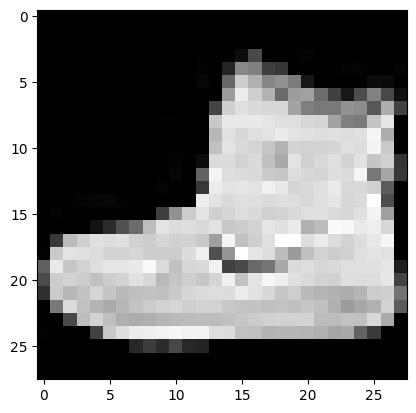

In [23]:
import matplotlib.pyplot as plt
import torchvision.datasets as dsets

mnist_dataset = dsets.FashionMNIST("ruta_donde_guardar_datos", download=True)

print(f"Tamaño del dataset {len(mnist_dataset)} imagenes.")
print(f"Clases posibles: {mnist_dataset.classes}")

data_idx = 0  # Indice (0-59999) de la imagen que queremos ver
image, label = mnist_dataset[0] 

print(f"Objeto imagen: {image} - Clase {label}")
print(f"Detalles de la imagen {image.size} pixeles")

plt.imshow(image, cmap='gray')
plt.show()

## FeedForward networks

Son la unidad más simple de red neuronal, con su origen en el perceptron de muchas capas. La idea es crear una secuencia lineal de neuronas (capa) que reciben nuestro input. 

![Image](https://upload.wikimedia.org/wikipedia/commons/c/c2/MultiLayerNeuralNetworkBigger_english.png)

De esta manera la primera capa de neuronas (input layer) recibe los datos y las capas subsiguientes reciben el resultados de capas anteriores. La última capa (output layer) es la encargada de generar una predicción a partir de nuestros inputs.

***

En este notebook vamos a usar un dataset muy simple y conocido de imágenes, Fashion-MNIST. Se trata de un dataset de ropa y calzado, la idea es usar redes neuronales para clasificar cada una de las imágenes el tipo de ropa que representa. 

Para trabajar con imagenes vamos a hacer uso de una librería complementaria a Pytorch: **torchvision** (https://pytorch.org/docs/stable/torchvision/index.html) que incluye varios datasets precargados, modelos preentrenados y algunas utilidades para trabajar con imágenes que nos van a resultar útiles.

*** 

En la celda de abajo vamos a carga nuestro dataset y mostrar algunas imagenes de ejemplo.


### Clasificador

Ahora que tenemos una idea de como es nuestro dataset, vamos a crear un modelo FeedForward para predecir la clase de la imagen que usemos como input. 

Antes que nada, vamos a necesitar dividir el dataset total en conjuntos de **entrenamiento**, **validacion** y **test**. Vamos a usar un ratio de 80 y 20% respectivamente. El set de test se puede descargar por separado con torchvision. Además, vamos a necesitar una manera de cargar **batches** de datos a la vez, para entrenar nuestra red. Pytorch nos proporciona varias ayudas para esto.

***

Finalmente, queda aclarar el uso de **tranformaciones** sobre las imágenes. Por lo pronto, tenemos objetos de tipo PIL Image, necesitamos (al menos) convertirlos en Tensores, para que Pytorch los pueda manejar.

Hay un numero inmenso de transformaciones posibles que podemos usar en nustras imagenes, en este caso basta con tranformarlas a tensores, pero dejamos este link para otros casos: https://pytorch.org/docs/stable/torchvision/transforms.html


In [24]:
#Esto nos permite cambiarle la forma a un tensor aplicandole una transformacion. 

class ReshapeTransform:
    def __init__(self, new_size):
        self.new_size = new_size

    def __call__(self, img):
        return torch.reshape(img, self.new_size)

In [25]:
import torchvision.transforms as transforms
# primero vamos a entrenar un perceptron 
img_transforms = transforms.Compose([transforms.ToTensor(), ReshapeTransform((-1,))]) # Reshape con -1 va a aplanar la matriz. Hay que aplanar la imagen.

# Descargamos los datasets
mnist_train_dataset = dsets.FashionMNIST("ruta_donde_guardar_datos", download=True, train=True, transform=img_transforms)

# Separamos el train set en train y validation
train_set, val_set = torch.utils.data.random_split(mnist_train_dataset, [int(0.8 * len(mnist_train_dataset)), int(0.2 * len(mnist_train_dataset))])

mnist_test_dataset = dsets.FashionMNIST("ruta_donde_guardar_datos", download=True, train=False, transform=img_transforms)

# Creamos objetos DataLoader (https://pytorch.org/docs/stable/data.html) que nos va a permitir crear batches de data automaticamente.

# Cuantas imagenes obtener en cada iteracion!
BATCH_SIZE = 64

# Creamos los loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2) # este carga los datos en la forma del batch size que defini, shuffle ordena aleatoriamente
val_loader = torch.utils.data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

test_loader = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

### Modelo

Vamos a considerar cada imagen como un tensor de una sola dimensión, de largo 28*28 = 784. Cada uno de esos valores representa el valor de un pixel de nuestra imagen original.

Nuestra red va a recibir ese tensor como input (en realidad, un batch de tensores de largo 784) que va a ser trabajado por varias capas ocultas con diferente número de neuronas hasta llegar a una capa de salida con 10 outputs, 1 por cada clase posible.

***

Vamos utilizar capas conectadas totalmente, tambien conocidas como Fully Connected, Dense, o Linear en Pytorch (https://pytorch.org/docs/stable/nn.html). Para crearlas necesitamos especificar las dimensiones del tensor de entrada, y el de salida; luego internamente Pytorch genera la matriz de pesos por los cuales multiplicar la entrada para generar la salida. Luego de cada una de estas operaciones necesitamos usar una funcion de activacion no linear, en este caso, vamos a usar ReLU: https://pytorch.org/docs/stable/nn.html#relu. 

***

Para implementar un modelo **cualquiera** alcanza con definir un metodo **init** donde especificamos la arquitectura del mismo, y un método **forward** donde especificamos cómo interactúan nuestras capas frente a un nuevo input.

***



In [26]:
# Definicion del modelo que vamos a usar. En Pytorch los modelos se definen como clases, que heredan de nn.Module
import torch.nn as nn # Este nos va a dar las capas 
import torch.nn.functional as F # este nos da las funciones de activación. 


class FeedForwardModel(nn.Module):

    def __init__(self, number_classes=10,input_features=784):
        super(FeedForwardModel, self).__init__()
        self.linear1 = nn.Linear(in_features=input_features, out_features=128) # 784*128 +128 (bias)
        self.linear2 = nn.Linear(in_features=128, out_features=64) # 128*64 + 64 (bias)
        self.output = nn.Linear(in_features=64, out_features=number_classes) #64*10 +10 (bias)
  
    def forward(self, new_input): # este es el que une todo, y ordena primero la ANN que tiene 784 entradas y 128 salidas, después 128 x 64 y despues 64 x number_classes
        result = F.relu(self.linear1(new_input))
        result = F.relu(self.linear2(result))
        logits = self.output(result)

        return logits


model = FeedForwardModel(number_classes=10,input_features=28*28*1) # nos falta el softmax acá y la función de pérdida. 
model

FeedForwardModel(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

### Entrenando el modelo

Para entrenar un modelo necesitamos una funcion de costo o pérdida (normalmente referida como loss function: https://pytorch.org/docs/stable/nn.html#loss-functions). En este curso no nos vamos a meter en mucho detalle sobre las funciones de costo, para este ejercicio y el siguiente vamos a usar la CrossEntropyLoss, y cuando necesiten otra la vamos a especificar.

El objetivo de esta funcion es darnos un valor de que tan malas fueron las predicciones del modelo respecto a los valores de verdad. Haciendo uso de backpropagation y del gradiente de esta funcion podemos optimizar los pesos de nuestra red tal que "aprenda" a hacer mejores predicciones. De nuevo, la lógica detras de toda esta optimización no nos compete en este curso y lo dejamos para la disciplina de Deep Learning.

***
Como mencionamos arriba, el costo de computa usando las predicciones del modelo y las etiquetas verdaderas de nuestros datos y, el trabajo de actualizar los pesos usando los gradientes lo realiza un optimizador de Pytorch: https://pytorch.org/docs/stable/optim.html.

In [27]:
import torch.optim as optim

LEARNING_RATE = 0.003

ff_model = FeedForwardModel(number_classes=10).to(DEVICE)
criterion = nn.CrossEntropyLoss().to(DEVICE)
ff_optimizer = optim.SGD(ff_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [28]:
def train_model(model, train_loader, val_loader, loss_func, optimizer, epochs):
    for epoch in range(epochs):  # Iteramos sobre el dataset entero muchas veces

        running_loss = 0.0  

        for i, data in enumerate(train_loader):
            # Nuestros datos son imagenes y la clase de cada una.
            images, labels = data
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)

            # Reseteamos los gradientes de los pesos del modelo.
            optimizer.zero_grad()   

            # Obtenemos las predicciones para las nuevas imagenes llamando a nuestro modelo.
            predictions = model(images)    

            # Calulamos el costo de nuestras predicciones respecto a la verdad
            loss = loss_func(predictions, labels)

            # Computamos los gradientes con backward y actualizamos los pesos con un optimizer.step()
            loss.backward()
            optimizer.step()

            # Estadísiticas
            running_loss += loss.item()
            if i % 500 == 499:    # Imprimimos luego de 1000 batches de datos
                print(f"Epoch: {epoch + 1}, Batch: {i + 1} - Loss: {running_loss / 500:.5f}")
                running_loss = 0.0


        # Luego de cada epoch de entrenamiento vemos la performance (accuracy) en el set de validacion
        with torch.no_grad():
            correct_predictions = 0.0

            for i, data in enumerate(val_loader):
                images, labels = data
                images = images.to(DEVICE)
                labels = labels.to(DEVICE)

                predictions = model(images)
                predictions = torch.argmax(predictions, dim=1)

                correct_predictions += (predictions == labels).detach().cpu().float().sum().item()

        print(f"Validation accuracy {(100 * correct_predictions / len(val_loader.dataset)):.2f} %")

    return model

In [29]:
def test_model(model, test_loader):
    # Finalmente Reportamos la performance en el test set:
    with torch.no_grad():
        correct_predictions = 0.0

        for i, data in enumerate(test_loader):
            images, labels = data
            images = images.to(DEVICE)
            labels = labels.to(DEVICE)

            predictions = model(images)
            predictions = torch.argmax(predictions, dim=1)

            correct_predictions += (predictions == labels).detach().cpu().float().sum().item()

    print(f"Test set accuracy {(100 * correct_predictions / len(test_loader.dataset)):.2f} %")

In [30]:
# Usando las funciones definidas arriba entrenar un modelo es trivial

ff_model = train_model(ff_model, train_loader, val_loader, loss_func=criterion, optimizer=ff_optimizer, epochs=15)
test_model(ff_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 1.24651
Validation accuracy 76.90 %
Epoch: 2, Batch: 500 - Loss: 0.59287
Validation accuracy 81.33 %
Epoch: 3, Batch: 500 - Loss: 0.50072
Validation accuracy 82.85 %
Epoch: 4, Batch: 500 - Loss: 0.45676
Validation accuracy 83.65 %
Epoch: 5, Batch: 500 - Loss: 0.43448
Validation accuracy 83.58 %
Epoch: 6, Batch: 500 - Loss: 0.41165
Validation accuracy 84.83 %
Epoch: 7, Batch: 500 - Loss: 0.39841
Validation accuracy 85.12 %
Epoch: 8, Batch: 500 - Loss: 0.38495
Validation accuracy 86.04 %
Epoch: 9, Batch: 500 - Loss: 0.37332
Validation accuracy 86.17 %
Epoch: 10, Batch: 500 - Loss: 0.35436
Validation accuracy 86.42 %
Epoch: 11, Batch: 500 - Loss: 0.34561
Validation accuracy 86.28 %
Epoch: 12, Batch: 500 - Loss: 0.33592
Validation accuracy 87.06 %
Epoch: 13, Batch: 500 - Loss: 0.33684
Validation accuracy 87.16 %
Epoch: 14, Batch: 500 - Loss: 0.32128
Validation accuracy 87.38 %
Epoch: 15, Batch: 500 - Loss: 0.31438
Validation accuracy 87.08 %
Test set accuracy 8

## Tarea 1

Cree y entrene un modelo de red FeedForward que funcione mejor que el visto en clase. Puede usar lo que considere necesario (siempre dentro del mundo de redes feed forward - nada de convoluciones)

In [31]:
# Definicion del modelo que vamos a usar. En Pytorch los modelos se definen como clases, que heredan de nn.Module
import torch.nn as nn # Este nos va a dar las capas 
import torch.nn.functional as F # este nos da las funciones de activación. 


class FeedForwardModel2(nn.Module):

    def __init__(self, number_classes=10,input_features=784):
        super(FeedForwardModel2, self).__init__()
        self.linear1 = nn.Linear(in_features=input_features, out_features=392) # 784*128 +128 (bias)
        self.linear2 = nn.Linear(in_features=392, out_features=128) # 784*128 +128 (bias)
        self.linear3 = nn.Linear(in_features=128, out_features=64) # 128*64 + 64 (bias)
        self.output = nn.Linear(in_features=64, out_features=number_classes) #64*10 +10 (bias)
  
    def forward(self, new_input): # este es el que une todo, y ordena primero la ANN que tiene 784 entradas y 128 salidas, después 128 x 64 y despues 64 x number_classes
        result = F.relu(self.linear1(new_input))
        result = F.relu(self.linear2(result))
        result = F.relu(self.linear3(result))
        logits = self.output(result)

        return logits


model = FeedForwardModel2(number_classes=10,input_features=28*28*1) # nos falta el softmax acá y la función de pérdida. 
model

FeedForwardModel2(
  (linear1): Linear(in_features=784, out_features=392, bias=True)
  (linear2): Linear(in_features=392, out_features=128, bias=True)
  (linear3): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)

In [32]:
import torch.optim as optim

LEARNING_RATE = 0.003

ff_model = FeedForwardModel2(number_classes=10).to(DEVICE)
criterion = nn.CrossEntropyLoss().to(DEVICE)
ff_optimizer = optim.SGD(ff_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [33]:
# Usando las funciones definidas arriba entrenar un modelo es trivial

ff_model = train_model(ff_model, train_loader, val_loader, loss_func=criterion, optimizer=ff_optimizer, epochs=15)
test_model(ff_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 1.53805
Validation accuracy 73.18 %
Epoch: 2, Batch: 500 - Loss: 0.62605
Validation accuracy 81.33 %
Epoch: 3, Batch: 500 - Loss: 0.51148
Validation accuracy 83.11 %
Epoch: 4, Batch: 500 - Loss: 0.46496
Validation accuracy 83.38 %
Epoch: 5, Batch: 500 - Loss: 0.43053
Validation accuracy 85.12 %
Epoch: 6, Batch: 500 - Loss: 0.40668
Validation accuracy 85.58 %
Epoch: 7, Batch: 500 - Loss: 0.38565
Validation accuracy 85.59 %
Epoch: 8, Batch: 500 - Loss: 0.36876
Validation accuracy 86.58 %
Epoch: 9, Batch: 500 - Loss: 0.35078
Validation accuracy 87.03 %
Epoch: 10, Batch: 500 - Loss: 0.33507
Validation accuracy 86.66 %
Epoch: 11, Batch: 500 - Loss: 0.32374
Validation accuracy 86.97 %
Epoch: 12, Batch: 500 - Loss: 0.31516
Validation accuracy 87.05 %
Epoch: 13, Batch: 500 - Loss: 0.30180
Validation accuracy 85.93 %
Epoch: 14, Batch: 500 - Loss: 0.29347
Validation accuracy 87.09 %
Epoch: 15, Batch: 500 - Loss: 0.28972
Validation accuracy 88.08 %
Test set accuracy 8

In [34]:
import torch.optim as optim

LEARNING_RATE = 0.005

ff_model = FeedForwardModel2(number_classes=10).to(DEVICE)
criterion = nn.CrossEntropyLoss().to(DEVICE)
ff_optimizer = optim.SGD(ff_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

# Usando las funciones definidas arriba entrenar un modelo es trivial

ff_model = train_model(ff_model, train_loader, val_loader, loss_func=criterion, optimizer=ff_optimizer, epochs=15)
test_model(ff_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 1.34217
Validation accuracy 79.47 %
Epoch: 2, Batch: 500 - Loss: 0.55473
Validation accuracy 83.27 %
Epoch: 3, Batch: 500 - Loss: 0.45737
Validation accuracy 83.90 %
Epoch: 4, Batch: 500 - Loss: 0.41165
Validation accuracy 84.71 %
Epoch: 5, Batch: 500 - Loss: 0.38002
Validation accuracy 86.00 %
Epoch: 6, Batch: 500 - Loss: 0.35722
Validation accuracy 86.23 %
Epoch: 7, Batch: 500 - Loss: 0.34140
Validation accuracy 87.15 %
Epoch: 8, Batch: 500 - Loss: 0.31784
Validation accuracy 87.27 %
Epoch: 9, Batch: 500 - Loss: 0.31029
Validation accuracy 87.53 %
Epoch: 10, Batch: 500 - Loss: 0.30041
Validation accuracy 87.78 %
Epoch: 11, Batch: 500 - Loss: 0.28542
Validation accuracy 87.81 %
Epoch: 12, Batch: 500 - Loss: 0.27298
Validation accuracy 88.05 %
Epoch: 13, Batch: 500 - Loss: 0.26737
Validation accuracy 88.57 %
Epoch: 14, Batch: 500 - Loss: 0.26032
Validation accuracy 87.40 %
Epoch: 15, Batch: 500 - Loss: 0.25995
Validation accuracy 88.05 %
Test set accuracy 8

In [35]:
import torch.optim as optim

LEARNING_RATE = 0.001

ff_model = FeedForwardModel2(number_classes=10).to(DEVICE)
criterion = nn.CrossEntropyLoss().to(DEVICE)
ff_optimizer = optim.SGD(ff_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

# Usando las funciones definidas arriba entrenar un modelo es trivial

ff_model = train_model(ff_model, train_loader, val_loader, loss_func=criterion, optimizer=ff_optimizer, epochs=15)
test_model(ff_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 2.23489
Validation accuracy 51.24 %
Epoch: 2, Batch: 500 - Loss: 1.06285
Validation accuracy 68.54 %
Epoch: 3, Batch: 500 - Loss: 0.76936
Validation accuracy 75.14 %
Epoch: 4, Batch: 500 - Loss: 0.65753
Validation accuracy 78.60 %
Epoch: 5, Batch: 500 - Loss: 0.59414
Validation accuracy 79.80 %
Epoch: 6, Batch: 500 - Loss: 0.54801
Validation accuracy 81.51 %
Epoch: 7, Batch: 500 - Loss: 0.50959
Validation accuracy 83.01 %
Epoch: 8, Batch: 500 - Loss: 0.48300
Validation accuracy 83.58 %
Epoch: 9, Batch: 500 - Loss: 0.46539
Validation accuracy 83.70 %
Epoch: 10, Batch: 500 - Loss: 0.44738
Validation accuracy 84.17 %
Epoch: 11, Batch: 500 - Loss: 0.43123
Validation accuracy 84.81 %
Epoch: 12, Batch: 500 - Loss: 0.42015
Validation accuracy 84.83 %
Epoch: 13, Batch: 500 - Loss: 0.41168
Validation accuracy 85.06 %
Epoch: 14, Batch: 500 - Loss: 0.40798
Validation accuracy 85.54 %
Epoch: 15, Batch: 500 - Loss: 0.39111
Validation accuracy 85.25 %
Test set accuracy 8

# Redes Convolucionales


![Image](https://www.unite.ai/wp-content/uploads/2019/12/Typical_cnn-1.png)


Las redes convolucionales (CNNs) se basan en el uso de una tecnica muy usada en el campo de computer vision tradicional, las **convoluciones** (https://en.wikipedia.org/wiki/Kernel_(image_processing), la idea es crear un filtro pequeño que pasamos por encima de toda la imagen y nos permite detectar distintos elementos (como son líneas verticales, horizontales, diagonales, circulos, etc). EL gran problema de las convoluciones es que para crear dichos filtros debemos poder especificar distintos valores (pesos) para cada región en el mismo. 

Cada filtro (tambien conocido como kernel) nos permite identificar algo en particular en la imágen, y aplicar un filtro al resultado de otro (u otros) nos permite obtener informacion de más alto nivel (como por ejemplo detectar ojos, ruedas, puertas, etc).

![Image](https://d2l.ai/_images/correlation.svg)

***

Las redes convolucionales nos dan una manera de no sólo aprender los vaores óptimos para dichos filtros (mediante backprop) sino tambien la posibilidad de hacerlo a escala usndo un número arbitrario de los mismos. Una gran ventaja que nos trae el uso de filtros, es el hecho de que requieren de un número muy chico de pesos a entrenar, lo que reduce el tamaño de nuestra red y nos permite entrenar mas rápido (o redes mas grandes y profundas con el mismo hardware).

Una cosa a notar en las redes convolucionales es el hecho de que las imágenes se van reduciendo en su tamaño a medida que fluyen por la red, esto se debe a la opeación de `maxpooling` que toma regiones (por lo general de 2x2) en nuestra imagen y se queda con el valor más alto en la zona, reduciendo asi el tamaño de la imagen. El resultado de aplicar un filtro de convolución a una imagen se llama `feature_map` y se puede pensar como otra imagen que describe la características de la original. 

***

Al final de nuestra red, necesitamos formar una predicción de la clase de nuestra imagen, por lo que tenemos que "achatar" estos feature maps y pasarlos por una (o varias) capas lineales que generen una predicción. Esto se puede ver como representar toda la informacion que conocemos de la imagen, como por ejemplo si tiene nariz, orejas, pelo, en un sólo vector; y decidir que ese vector representa a un perro.

***

Para empezar, volvemos a definir nuestros conjuntos de datos. Esta vez, sin hacer uso de ninguna transformacion sobre la imagen (mas que transformarla en un tensor).

In [36]:
import torchvision.transforms as transforms

# Descargamos los datasets
mnist_train_dataset = dsets.FashionMNIST("ruta_donde_guardar_datos", download=True, train=True, transform=transforms.ToTensor())

# Separamos el train set en train y validation
train_set, val_set = torch.utils.data.random_split(mnist_train_dataset, [int(0.8 * len(mnist_train_dataset)), int(0.2 * len(mnist_train_dataset))])

mnist_test_dataset = dsets.FashionMNIST("ruta_donde_guardar_datos", download=True, train=False, transform=transforms.ToTensor())

# Creamos objetos DataLoader (https://pytorch.org/docs/stable/data.html) que nos va a permitir crear batches de data automaticamente.

# Cuantas imagenes obtener en cada iteracion!
BATCH_SIZE = 64

# Creamos los loaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

test_loader = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

### Modelo Convolucional

Igual que con el modelo FeedForward, para crear un modelo usando convoluciones necesitamos crear una clase, definir los metodos **init** y **forward** y especificar la arcquitectura y comportamiento de los componentes del modelo. 

En particular vamos a usar:

- capas convolucionales de 2D (https://pytorch.org/docs/stable/nn.html#conv2d) a las que tenemos que especificarles la cantidad de canales de entrada (1 para gris, 3 para color y X para el resultado de un filtro anterior), una cantidad de filtros a usar (out_channels), el tamaño de los mismos (kernel_size) y si aplicamos padding (relleno) o no (esto nos permite hacer convoluciones que no modifiquen el tamaño original de las imagenes). 

- Capas de maxpooling (https://pytorch.org/docs/stable/nn.html#maxpool2d) a las que tenemos que decirles el tamaño de la ventana a mirar y el largo del paso que deben tomar (stride).

- Finalmente tambien haremos uso de capas lineales y ReLUs como hicimos anteriormente.

In [37]:
class ConvolutionalModel(nn.Module):
    def __init__(self, number_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1) # kernel_size el tamaño de la matriz que arrastro sobre la imagen. padding agrega valores en las esquinas para que entre el kernel y no nos quite filas y columnas, es decir no cambie el tamaño de la imagen. 
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1)
        
        self.pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)   # Regiones de 2x2 con paso 2.
        
        # Nuestras imagenes son de 28x28 y vamos a aplicar 2 veces la capa de pooling
        # por lo que el resultado es de tamaño 7x7 (28 / 2 / 2).
        # El 16 es porque terminamos con 16 feature maps de 7x7
        
        self.fc1 = nn.Linear(in_features=7*7*8, out_features=128) # Imagenes de 7*7 con 8 canales. El 128 es porque queda bien, se podria cambiar. 
        
        self.output = nn.Linear(in_features=128, out_features=number_classes)
        

    def forward(self, new_input):
        result = self.conv1(new_input)
        result = F.relu(self.pooling_layer(result))
        
        result = self.conv2(result)
        result = F.relu(self.pooling_layer(result))     
        
        # "Achatamos" los feature maps
        result = result.reshape((-1, self.fc1.in_features))
        result = F.relu(self.fc1(result))
        
        return self.output(result)

In [38]:
conv_model = ConvolutionalModel(number_classes=10).to(DEVICE)

LEARNING_RATE = 0.03

criterion = nn.CrossEntropyLoss().to(DEVICE)
conv_optimizer = optim.SGD(conv_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

conv_model = train_model(conv_model, train_loader, val_loader, loss_func=criterion, optimizer=conv_optimizer, epochs=10)
test_model(conv_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 0.74725
Validation accuracy 85.29 %
Epoch: 2, Batch: 500 - Loss: 0.36893
Validation accuracy 87.59 %
Epoch: 3, Batch: 500 - Loss: 0.31325
Validation accuracy 89.14 %
Epoch: 4, Batch: 500 - Loss: 0.28548
Validation accuracy 89.96 %
Epoch: 5, Batch: 500 - Loss: 0.27049
Validation accuracy 89.96 %
Epoch: 6, Batch: 500 - Loss: 0.25167
Validation accuracy 89.45 %
Epoch: 7, Batch: 500 - Loss: 0.23855
Validation accuracy 90.66 %
Epoch: 8, Batch: 500 - Loss: 0.22197
Validation accuracy 90.62 %
Epoch: 9, Batch: 500 - Loss: 0.21201
Validation accuracy 90.13 %
Epoch: 10, Batch: 500 - Loss: 0.20491
Validation accuracy 90.45 %
Test set accuracy 89.71 %


In [39]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from torchsummary import summary

In [41]:
summary(conv_model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3            [-1, 8, 14, 14]           1,160
         MaxPool2d-4              [-1, 8, 7, 7]               0
            Linear-5                  [-1, 128]          50,304
            Linear-6                   [-1, 10]           1,290
Total params: 52,914
Trainable params: 52,914
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.14
Params size (MB): 0.20
Estimated Total Size (MB): 0.34
----------------------------------------------------------------


In [42]:
summary(ff_model,(1*28*28,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 392]         307,720
            Linear-2                  [-1, 128]          50,304
            Linear-3                   [-1, 64]           8,256
            Linear-4                   [-1, 10]             650
Total params: 366,930
Trainable params: 366,930
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.40
Estimated Total Size (MB): 1.41
----------------------------------------------------------------


## Tarea 2

Cree y entrene un modelo de red Convolucional que funcione mejor que el visto en clase. Puede usar lo que considere necesario.

**Modificar esto de abajo:**

In [59]:
class ConvolutionalModel(nn.Module):
    def __init__(self, number_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1) # kernel_size el tamaño de la matriz que arrastro sobre la imagen. padding agrega valores en las esquinas para que entre el kernel y no nos quite filas y columnas, es decir no cambie el tamaño de la imagen. 
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1)
        
        self.pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)   # Regiones de 2x2 con paso 2.
        
        # Nuestras imagenes son de 28x28 y vamos a aplicar 2 veces la capa de pooling
        # por lo que el resultado es de tamaño 7x7 (28 / 2 / 2).
        # El 16 es porque terminamos con 16 feature maps de 7x7
        
        self.fc1 = nn.Linear(in_features=7*7*8, out_features=64) # Imagenes de 7*7 con 8 canales. El 128 es porque queda bien, se podria cambiar. 
        
        self.output = nn.Linear(in_features=64, out_features=number_classes)
        

    def forward(self, new_input):
        result = self.conv1(new_input)
        result = F.relu(self.pooling_layer(result))
        
        result = self.conv2(result)
        result = F.relu(self.pooling_layer(result))     
        
        # "Achatamos" los feature maps
        result = result.reshape((-1, self.fc1.in_features))
        result = F.relu(self.fc1(result))

        return self.output(result)

In [60]:
conv_model = ConvolutionalModel(number_classes=10).to(DEVICE)

LEARNING_RATE = 0.03

criterion = nn.CrossEntropyLoss().to(DEVICE)
conv_optimizer = optim.SGD(conv_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

conv_model = train_model(conv_model, train_loader, val_loader, loss_func=criterion, optimizer=conv_optimizer, epochs=10)
test_model(conv_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 0.68366
Validation accuracy 86.43 %
Epoch: 2, Batch: 500 - Loss: 0.36471
Validation accuracy 87.81 %
Epoch: 3, Batch: 500 - Loss: 0.31443
Validation accuracy 88.46 %
Epoch: 4, Batch: 500 - Loss: 0.29405
Validation accuracy 88.96 %
Epoch: 5, Batch: 500 - Loss: 0.26948
Validation accuracy 88.56 %
Epoch: 6, Batch: 500 - Loss: 0.26007
Validation accuracy 89.50 %
Epoch: 7, Batch: 500 - Loss: 0.24634
Validation accuracy 89.04 %
Epoch: 8, Batch: 500 - Loss: 0.23840
Validation accuracy 90.08 %
Epoch: 9, Batch: 500 - Loss: 0.22709
Validation accuracy 89.03 %
Epoch: 10, Batch: 500 - Loss: 0.22352
Validation accuracy 89.77 %
Test set accuracy 89.05 %


In [48]:
conv_model = ConvolutionalModel(number_classes=10).to(DEVICE)

LEARNING_RATE = 0.01

criterion = nn.CrossEntropyLoss().to(DEVICE)
conv_optimizer = optim.SGD(conv_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

conv_model = train_model(conv_model, train_loader, val_loader, loss_func=criterion, optimizer=conv_optimizer, epochs=10)
test_model(conv_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 0.89435
Validation accuracy 81.25 %
Epoch: 2, Batch: 500 - Loss: 0.45540
Validation accuracy 85.62 %
Epoch: 3, Batch: 500 - Loss: 0.38156
Validation accuracy 87.31 %
Epoch: 4, Batch: 500 - Loss: 0.35223
Validation accuracy 87.62 %
Epoch: 5, Batch: 500 - Loss: 0.31362
Validation accuracy 88.33 %
Epoch: 6, Batch: 500 - Loss: 0.29501
Validation accuracy 88.53 %
Epoch: 7, Batch: 500 - Loss: 0.27681
Validation accuracy 88.87 %
Epoch: 8, Batch: 500 - Loss: 0.26409
Validation accuracy 89.72 %
Epoch: 9, Batch: 500 - Loss: 0.25528
Validation accuracy 89.72 %
Epoch: 10, Batch: 500 - Loss: 0.24294
Validation accuracy 90.05 %
Test set accuracy 89.60 %


In [49]:
conv_model = ConvolutionalModel(number_classes=10).to(DEVICE)

LEARNING_RATE = 0.05

criterion = nn.CrossEntropyLoss().to(DEVICE)
conv_optimizer = optim.SGD(conv_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

conv_model = train_model(conv_model, train_loader, val_loader, loss_func=criterion, optimizer=conv_optimizer, epochs=10)
test_model(conv_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 0.69409
Validation accuracy 84.51 %
Epoch: 2, Batch: 500 - Loss: 0.40213
Validation accuracy 85.73 %
Epoch: 3, Batch: 500 - Loss: 0.35558
Validation accuracy 85.31 %
Epoch: 4, Batch: 500 - Loss: 0.33115
Validation accuracy 87.13 %
Epoch: 5, Batch: 500 - Loss: 0.31591
Validation accuracy 87.87 %
Epoch: 6, Batch: 500 - Loss: 0.29288
Validation accuracy 88.62 %
Epoch: 7, Batch: 500 - Loss: 0.28754
Validation accuracy 88.65 %
Epoch: 8, Batch: 500 - Loss: 0.27197
Validation accuracy 88.63 %
Epoch: 9, Batch: 500 - Loss: 0.26025
Validation accuracy 88.16 %
Epoch: 10, Batch: 500 - Loss: 0.24437
Validation accuracy 88.83 %
Test set accuracy 88.16 %


In [50]:
conv_model = ConvolutionalModel(number_classes=10).to(DEVICE)

LEARNING_RATE = 0.03

criterion = nn.CrossEntropyLoss().to(DEVICE)
conv_optimizer = optim.SGD(conv_model.parameters(), lr=LEARNING_RATE, momentum=0.8)

conv_model = train_model(conv_model, train_loader, val_loader, loss_func=criterion, optimizer=conv_optimizer, epochs=10)
test_model(conv_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 0.79963
Validation accuracy 83.16 %
Epoch: 2, Batch: 500 - Loss: 0.43362
Validation accuracy 86.11 %
Epoch: 3, Batch: 500 - Loss: 0.35876
Validation accuracy 86.74 %
Epoch: 4, Batch: 500 - Loss: 0.32361
Validation accuracy 88.52 %
Epoch: 5, Batch: 500 - Loss: 0.30056
Validation accuracy 88.72 %
Epoch: 6, Batch: 500 - Loss: 0.28567
Validation accuracy 88.88 %
Epoch: 7, Batch: 500 - Loss: 0.26925
Validation accuracy 89.59 %
Epoch: 8, Batch: 500 - Loss: 0.25706
Validation accuracy 89.79 %
Epoch: 9, Batch: 500 - Loss: 0.24350
Validation accuracy 89.47 %
Epoch: 10, Batch: 500 - Loss: 0.24346
Validation accuracy 90.35 %
Test set accuracy 89.77 %


In [56]:

class ConvolutionalModel(nn.Module):
    def __init__(self, number_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1) # kernel_size el tamaño de la matriz que arrastro sobre la imagen. padding agrega valores en las esquinas para que entre el kernel y no nos quite filas y columnas, es decir no cambie el tamaño de la imagen. 
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=8, kernel_size=3, padding=1)
        
        self.pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)   # Regiones de 2x2 con paso 2.
        
        # Nuestras imagenes son de 28x28 y vamos a aplicar 1 veces la capa de pooling
        # por lo que el resultado es de tamaño 7x7 (28 / 2 ).
        # El 16 es porque terminamos con 16 feature maps de 7x7
        
        self.fc1 = nn.Linear(in_features=14*14*8, out_features=64) # Imagenes de 7*7 con 8 canales. El 128 es porque queda bien, se podria cambiar. 
        
        self.output = nn.Linear(in_features=64, out_features=number_classes)
        

    def forward(self, new_input):
        result = self.conv1(new_input)
        result = F.relu(self.pooling_layer(result))
        
        # "Achatamos" los feature maps
        result = result.reshape((-1, self.fc1.in_features))
        result = F.relu(self.fc1(result))

        return self.output(result)

In [61]:
conv_model = ConvolutionalModel(number_classes=10).to(DEVICE)

BATCH_SIZE = 128

LEARNING_RATE = 0.03

criterion = nn.CrossEntropyLoss().to(DEVICE)
conv_optimizer = optim.SGD(conv_model.parameters(), lr=LEARNING_RATE, momentum=0.9)

conv_model = train_model(conv_model, train_loader, val_loader, loss_func=criterion, optimizer=conv_optimizer, epochs=10)
test_model(conv_model, test_loader)

Epoch: 1, Batch: 500 - Loss: 0.67814
Validation accuracy 85.24 %
Epoch: 2, Batch: 500 - Loss: 0.36029
Validation accuracy 88.16 %
Epoch: 3, Batch: 500 - Loss: 0.30347
Validation accuracy 89.41 %
Epoch: 4, Batch: 500 - Loss: 0.27304
Validation accuracy 89.65 %
Epoch: 5, Batch: 500 - Loss: 0.26676
Validation accuracy 88.73 %
Epoch: 6, Batch: 500 - Loss: 0.25640
Validation accuracy 90.42 %
Epoch: 7, Batch: 500 - Loss: 0.23810
Validation accuracy 90.31 %
Epoch: 8, Batch: 500 - Loss: 0.22834
Validation accuracy 89.63 %
Epoch: 9, Batch: 500 - Loss: 0.21988
Validation accuracy 90.50 %
Epoch: 10, Batch: 500 - Loss: 0.21703
Validation accuracy 89.49 %
Test set accuracy 88.98 %
